In [4]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Conv2D, MaxPooling2D

2023-12-28 08:09:09.826839: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
train_csv_path = '/Users/hoyi/Desktop/eyes_data/train.csv'
train_pd = pd.read_csv(train_csv_path)  #存到pd框架

In [6]:
train_id = train_pd['id_code'].tolist() 
y_train = train_pd['diagnosis'].tolist()
print(train_pd[['id_code', 'diagnosis']])

           id_code  diagnosis
0     000c1434d8d7          2
1     001639a390f0          4
2     0024cdab0c1e          1
3     002c21358ce6          0
4     005b95c28852          0
...            ...        ...
3657  ffa47f6a7bf4          2
3658  ffc04fed30e6          0
3659  ffcf7b45f213          2
3660  ffd97f8cd5aa          0
3661  ffec9a18a3ce          2

[3662 rows x 2 columns]


In [7]:
x_train = [os.path.join('/Users/hoyi/Desktop/eyes_data/eye_train_images', f"{id_code}.png")for id_code in train_id]  
#將訓練集圖片和train_ids連接起來

In [8]:
def data_preprocess(image_preprocess):
    img = Image.open(image_preprocess)
    img = img.resize((224, 224))   
    img_array = np.array(img)  
    img_array = img_array / 255.0 
    return img_array

In [9]:
x_train = [data_preprocess(image_preprocess) for image_preprocess in x_train]

In [10]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [11]:
# 分割數據集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

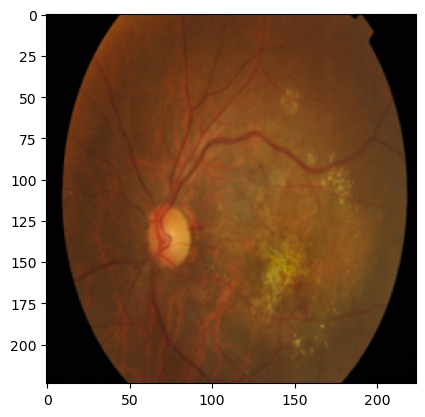

In [12]:
plt.imshow(x_train[1])

In [13]:
x_train

array([[[[0.00784314, 0.00392157, 0.        ],
         [0.00784314, 0.00392157, 0.        ],
         [0.01176471, 0.00784314, 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00392157, 0.        ],
         [0.00784314, 0.        , 0.        ]],

        [[0.00784314, 0.00392157, 0.        ],
         [0.00784314, 0.00392157, 0.        ],
         [0.00784314, 0.00392157, 0.        ],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00392157, 0.        ],
         [0.00784314, 0.        , 0.        ]],

        [[0.00784314, 0.00392157, 0.        ],
         [0.00784314, 0.00392157, 0.        ],
         [0.01568627, 0.01176471, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00784314, 0.00392157, 0.        ],
         [0.01176471, 0.00784314, 0.        ]],

        ...,

        [[0.00784314, 0.00784314, 0.00784314],
         [0.        , 0.        , 0.        ]

In [14]:
print(np.min(x_train[0]), np.max(x_train[0]))

0.0 1.0


In [15]:
x_train.shape

(2929, 224, 224, 3)

In [16]:
# original_image = x_train[1]
# gray_image = cv2.cvtColor((original_image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
# plt.imshow(gray_image, cmap='gray')
# plt.show()

In [17]:
# original_image

In [18]:
from keras.layers import Flatten,Dense

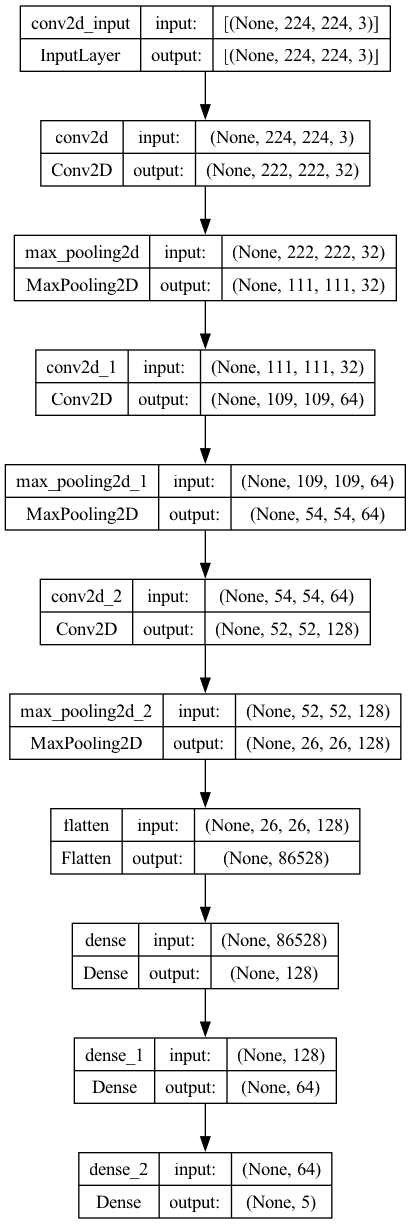

In [19]:
CNN = keras.Sequential(name='CNN')

CNN.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))   #卷積層 池化層
CNN.add(MaxPooling2D((2, 2)))

CNN.add(Conv2D(64, (3, 3), activation='relu'))
CNN.add(MaxPooling2D((2, 2)))

CNN.add(Conv2D(128, (3, 3), activation='relu'))
CNN.add(MaxPooling2D((2, 2)))

CNN.add(Flatten())

CNN.add(Dense(128, activation='relu')) #全連接層
CNN.add(Dense(64, activation='relu'))

CNN.add(Dense(5, activation='softmax'))  #輸出層
keras.utils.plot_model(CNN, show_shapes=True) 


In [20]:
# CNN.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy) 
CNN.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [21]:
print("圖片樣本數:", len(x_train))
print("標籤樣本數:", len(y_train))

圖片樣本數: 2929
標籤樣本數: 2929


In [22]:
history = CNN.fit(x_train, y_train, epochs=28)

Epoch 1/28
92/92 [==============================] - 89s 944ms/step - loss: 0.9586 - accuracy: 0.6695
Epoch 2/28
92/92 [==============================] - 97s 1s/step - loss: 0.7517 - accuracy: 0.7241
Epoch 3/28
92/92 [==============================] - 93s 1s/step - loss: 0.7270 - accuracy: 0.7313
Epoch 4/28
92/92 [==============================] - 96s 1s/step - loss: 0.7221 - accuracy: 0.7337
Epoch 5/28
92/92 [==============================] - 104s 1s/step - loss: 0.6960 - accuracy: 0.7426
Epoch 6/28
92/92 [==============================] - 100s 1s/step - loss: 0.6602 - accuracy: 0.7562
Epoch 7/28
92/92 [==============================] - 102s 1s/step - loss: 0.6293 - accuracy: 0.7709
Epoch 8/28
92/92 [==============================] - 103s 1s/step - loss: 0.5639 - accuracy: 0.7924
Epoch 9/28
92/92 [==============================] - 104s 1s/step - loss: 0.5104 - accuracy: 0.8119
Epoch 10/28
92/92 [==============================] - 105s 1s/step - loss: 0.4499 - accuracy: 0.8389
Epoch 11/2

In [35]:
print(history.history['loss'])

[0.9586186408996582, 0.7517374157905579, 0.7270157933235168, 0.7220903038978577, 0.6959893107414246, 0.6601755619049072, 0.6292831897735596, 0.5638970732688904, 0.5103963613510132, 0.44988366961479187, 0.3637070059776306, 0.2917225956916809, 0.22373630106449127, 0.1757616549730301, 0.13079731166362762, 0.10761991143226624, 0.08508573472499847, 0.07890158146619797, 0.10418405383825302, 0.06915687769651413, 0.05752202495932579, 0.03990838676691055, 0.03612706810235977, 0.03402085229754448, 0.028259819373488426, 0.02619786374270916, 0.027467044070363045, 0.025658365339040756]


In [36]:
test_loss, test_acc = CNN.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)
print('Test loss:', test_loss)

23/23 - 6s - loss: 2.0427 - accuracy: 0.7135 - 6s/epoch - 276ms/step

Test accuracy: 0.7135061621665955
Test loss: 2.0426530838012695


In [37]:
test_path = '/Users/hoyi/Desktop/eyes_data/eye_train_images/0981195eb9fb.png'
test_image = data_preprocess(test_path)
test = np.expand_dims(test_image, axis=0)  #添加一維度
prediction = CNN.predict(test)
print(prediction)

1/1 [==============================] - 0s 39ms/step
[[2.7677506e-11 2.8327609e-06 6.2704316e-07 5.2900767e-05 9.9994361e-01]]


In [38]:
Diagnosis = np.argmax(prediction)
print("diagnosis:", Diagnosis)

diagnosis: 4


In [33]:
    test_loss, test_acc = CNN.evaluate(test, None)

1/1 [==============================] - 0s 31ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


In [34]:
print(test_loss)

0.0


In [55]:
# CNN.save('/Users/hoyi/Desktop/eyes_data/CNNmodel1.h5')